# Image classification with CLIP

In this notebook, we explore how to use CLIP to classify images using zero-shot classification.
We will apply the following steps:
* Install required packages
* Load a dataset (CIFAR10 here)
* Classify all the images of the dataset
* Compute several metrics and display the confusion matrix

## Install required packages

In [ ]:
pip install transformers Pillow torch datasets matplotlib scikit-learn


## Load CLIP: model, processor and tokenizer using transformers

In [2]:
#Import packages
import torch
from PIL import Image
from transformers import AutoProcessor, CLIPModel, AutoImageProcessor, AutoModel, AutoTokenizer

#Define device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

#Load CLIP model, processor and tokenizer
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

## Load CIFAR 10 dataset
We use this dataset as it has 10 pre-defined classes

Found cached dataset cifar10 (/home/alm/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 927.12it/s]


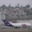

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [14]:
from datasets import load_dataset

#Load cifar10 dataset
dataset = load_dataset("cifar10")

#Display an image
display(dataset['train'][0]['img'])

#Display the list of labels
labels = dataset["train"].features["label"].names
print(labels)

## Classify one image

In [47]:
#Take the first image in the training set
image = dataset['train'][0]['img']
#Classify using the list of labels
def classify(image):
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True).to(device)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1) 
    l = probs.argmax()
    return l

l = classify(image)
print(labels[l])
#The first image seen above was classified as an airplane

airplane


## Classify all the images in the test set (10k images)

In [49]:
predictions= [] 
ground_truth= [d['label'] for d in dataset['test']]

i=0
for img in dataset['test']:
    pred = classify(img['img'])
    predictions.append(pred.item())
    i+=1
    if i%1000==0:
        print(i)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


## Compute metrics

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
y_true = ground_truth 
y_pred = predictions 

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Generate classification report
print('\nClassification Report:')
print(classification_report(y_true, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.8735
Precision: 0.8810
Recall: 0.8735
F1 Score: 0.8734

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1000
           1       0.93      0.90      0.91      1000
           2       0.73      0.92      0.81      1000
           3       0.89      0.79      0.84      1000
           4       0.89      0.82      0.85      1000
           5       0.89      0.85      0.87      1000
           6       0.96      0.77      0.85      1000
           7       0.81      0.97      0.88      1000
           8       0.90      0.96      0.93      1000
           9       0.89      0.94      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000


Confusion Matrix:
[[811   7 119   0   0   0   2   0  45  16]
 [  2 897   0   0   0   0   0   1   5  95]
 [  5   1 916   8  25   9   3  32   1   0]
 [

## Plot confusion matrix

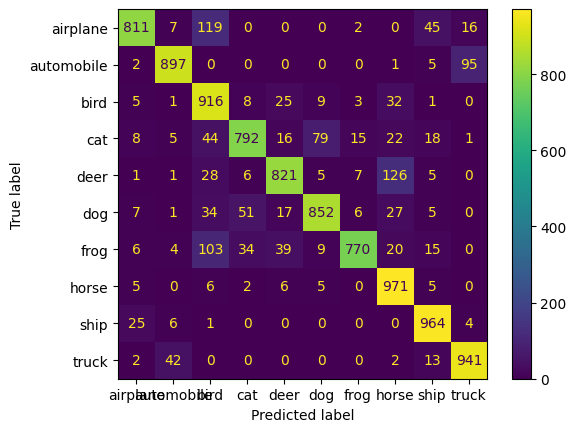

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=labels)
disp.plot()
plt.show()